PRIMEIRA QUESTÃO
1) Modele os seguintes sólidos/objetos 
Na construção dos sólidos, crie uma função que retorne o sólido ( ou seja, retorne a matriz de vértices e arestas). Perceba que cada objeto é descrito indiretamente (no caso do cone, por exemplo, pelo raio e pela altura). A origem do objeto pode ser definida de forma fixa dentro da função ou, opcionalmente, pode ser passada também como parâmetro da função.

In [2]:
import sys
import numpy as np
sys.path.append('./modelos')  # adiciona a pasta modelos ao path

from utils import plotar_malha_3d

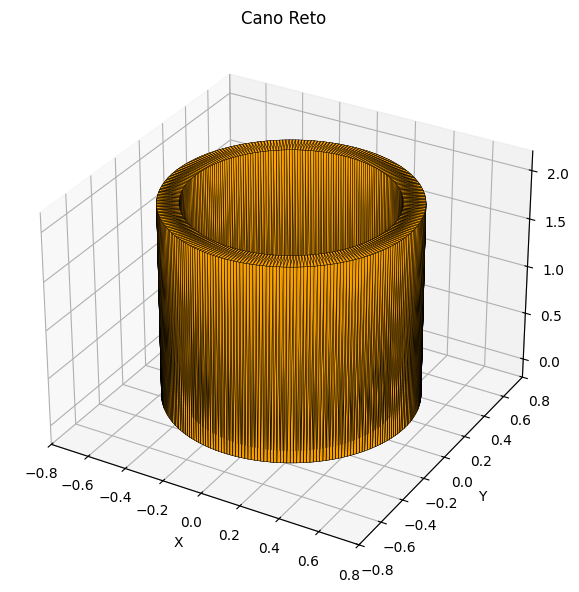

In [3]:
from cano_reto import modelar_cano_reto

vertices, faces = modelar_cano_reto(raio_interno=0.5, raio_externo=0.6, altura=2.0, resolucao=256)

plotar_malha_3d(vertices, faces, titulo="Cano Reto", cor="orange", borda="black")

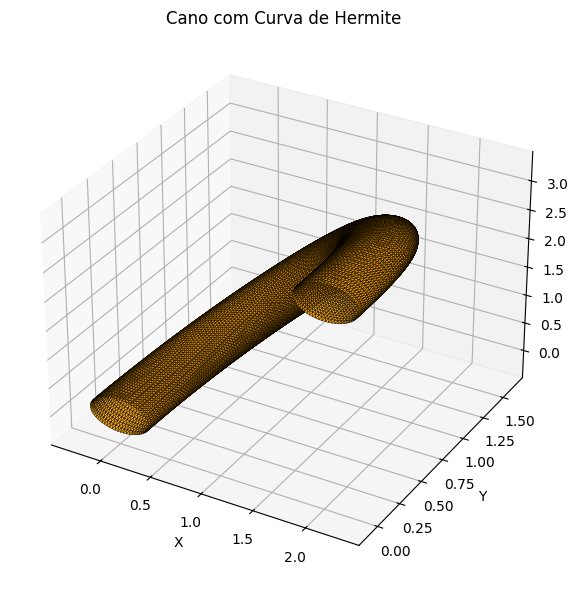

In [4]:
from cano_curvado import gerar_cano_curvado

# Ponto inicial e final
P0 = np.array([0, 0, 0])
P1 = np.array([2, 0, 3])

# Tangentes para gerar curva
T0 = np.array([0, 5, 0])    
T1 = np.array([0, -5, 0])

vertices, faces = gerar_cano_curvado(P0, P1, T0, T1, raio=0.3, resolucao_circular=64, resolucao_curva=150) # aceita os parametros, default -> raio=0.2, resolucao_circular=16, resolucao_curva=100
plotar_malha_3d(vertices, faces, titulo="Cano com Curva de Hermite")

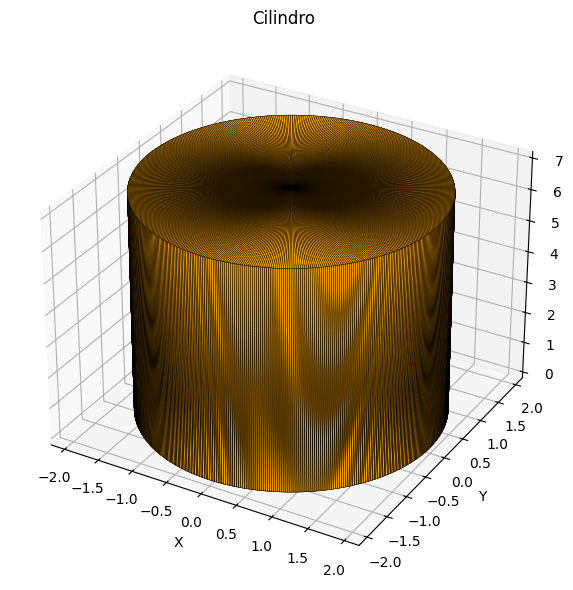

In [5]:
from cilindro import modelar_cilindro

vertices, faces = modelar_cilindro(raio=2.0, altura=7.0, resolucao=512)
plotar_malha_3d(vertices, faces, titulo="Cilindro")

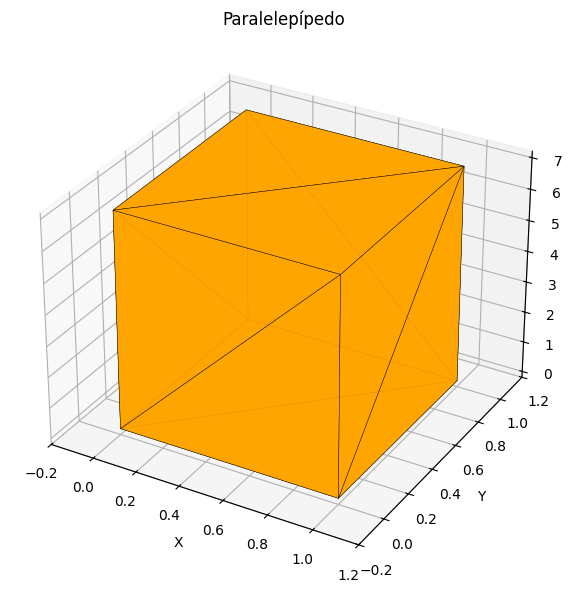

In [6]:
from paralelepipedo import modelar_paralelepipedo

vertices, faces = modelar_paralelepipedo(base=1, altura=7, comprimento=1)
plotar_malha_3d(vertices, faces, titulo="Paralelepípedo")

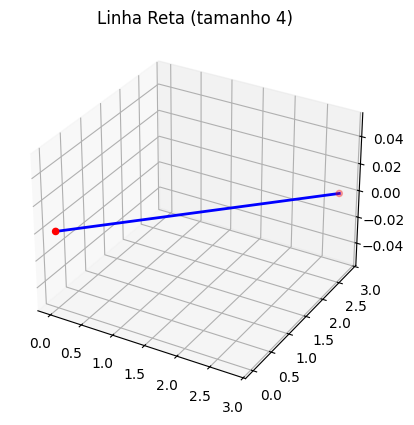

In [7]:
from reta import modelar_linha
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Gera a linha
vertices = modelar_linha(tamanho=4, direcao=np.array([1, 1, 0]))

# Plota a linha manualmente (sem malha triangular)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_vals = [v[0] for v in vertices]
y_vals = [v[1] for v in vertices]
z_vals = [v[2] for v in vertices]

ax.plot(x_vals, y_vals, z_vals, color='blue', linewidth=2)
ax.scatter(x_vals, y_vals, z_vals, color='red')  # marca os pontos
ax.set_title("Linha Reta (tamanho 4)")
plt.show()

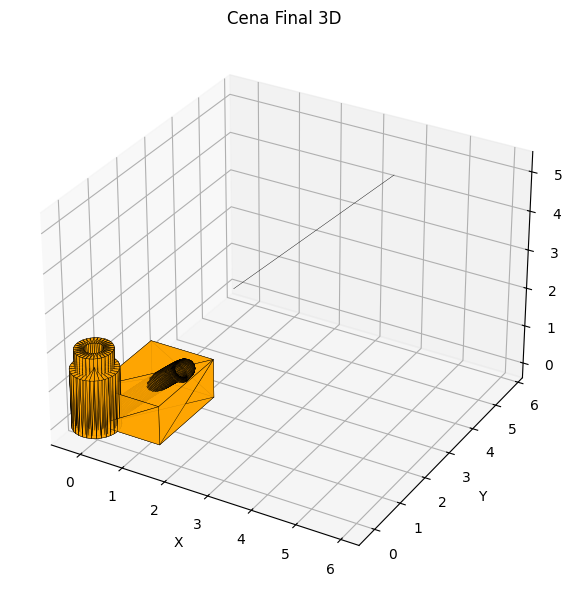

In [8]:
from cano_reto import modelar_cano_reto
from cano_curvado import gerar_cano_curvado
from cilindro import modelar_cilindro
from paralelepipedo import modelar_paralelepipedo
from reta import modelar_linha
from utils import transformar_vertices, normalizar_cena
import numpy as np

# 1. Criar e transformar os objetos
v1, f1 = modelar_cano_reto(0.2, 0.4, 2)
v1 = transformar_vertices(v1, escala=1.0, translacao=np.array([0, 0, 0]))

v2, f2 = gerar_cano_curvado(
    P0=np.array([0, 0, 0]),
    P1=np.array([2, 0, 2]),
    T0=np.array([0, 3, 0]),
    T1=np.array([0, -3, 0]),
    raio=0.2
)
v2 = transformar_vertices(v2, escala=1.0, translacao=np.array([4, 0, 0]))

v3, f3 = modelar_cilindro(raio=0.5, altura=1.5)
v3 = transformar_vertices(v3, escala=1.0, translacao=np.array([0, 4, 0]))

v4, f4 = modelar_paralelepipedo(base=1.5, altura=1.0, comprimento=2.0)
v4 = transformar_vertices(v4, escala=1.0, translacao=np.array([4, 4, 0]))


v5 = modelar_linha(tamanho=4, direcao=np.array([1, 1, 1]), origem=np.array([2, 2, 3]))
v5 = transformar_vertices(v5, translacao=np.array([0, 0, 0]))
f5 = [[v5[0], v5[1], v5[1]]]

# 2. Combinar todos os vértices e faces
vertices_total = v1 + v2 + v3 + v4 + v5
faces_total = f1 + f2 + f3 + f4 + f5

# 3. Normalizar a cena para que todos os vértices fiquem até no máximo 10
vertices_total = normalizar_cena(vertices_total, limite=10.0)

# 4. Plotar
plotar_malha_3d(vertices_total, faces_total, titulo="Cena Final 3D")